In [2]:
from fastai.vision.all import *
import torch

In [9]:
path = Path("images")

pathlib.PosixPath

In [11]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, valid_pct = 0.5)

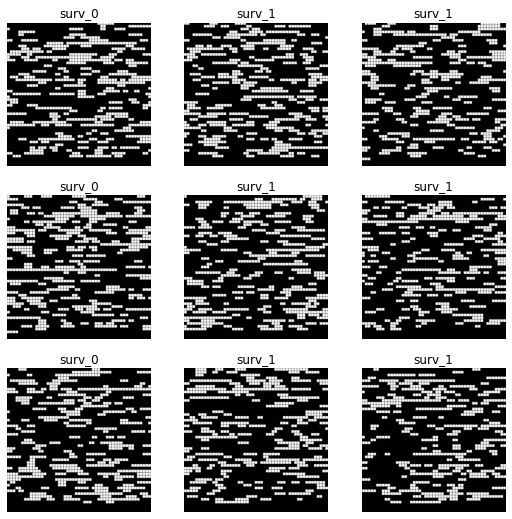

In [12]:
dls.show_batch()

In [14]:
(path/'surv_0').ls()

(#594) [Path('images/surv_0/10686.png'),Path('images/surv_0/8834.png'),Path('images/surv_0/9243.png'),Path('images/surv_0/6602.png'),Path('images/surv_0/7246.png'),Path('images/surv_0/11201.png'),Path('images/surv_0/5860.png'),Path('images/surv_0/2855.png'),Path('images/surv_0/4565.png'),Path('images/surv_0/4571.png')...]

In [17]:
non_survs = (path/'surv_0').ls().sorted()
survs = (path/'surv_1').ls().sorted()

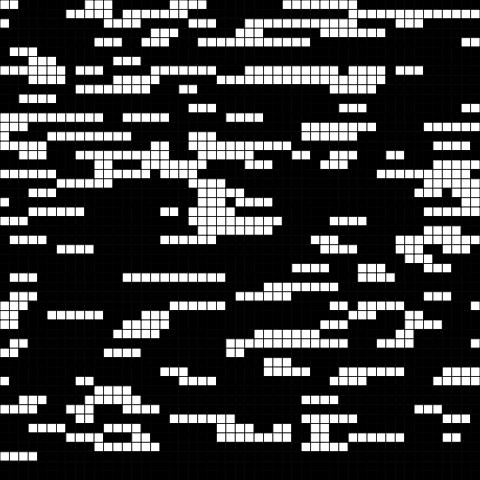

In [20]:
im_path = non_survs[0]
im = Image.open(im_path)
im

In [22]:
non_survs_t = [tensor(Image.open(o)) for o in non_survs]
survs_t = [tensor(Image.open(o)) for o in survs]

<AxesSubplot:>

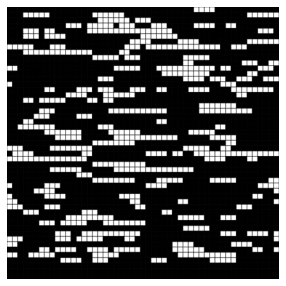

In [26]:
show_image(non_survs_t[4])

## Is AI needed? Let's try simple array averages!

In [29]:
stacked_non_survs = torch.stack(non_survs_t).float()/255
stacked_survs = torch.stack(survs_t).float()/255

In [30]:
stacked_non_survs.shape

torch.Size([594, 480, 480, 4])

In [33]:
mean_surv = stacked_survs.mean(0)
mean_non_surv = stacked_non_survs.mean(0)

<AxesSubplot:>

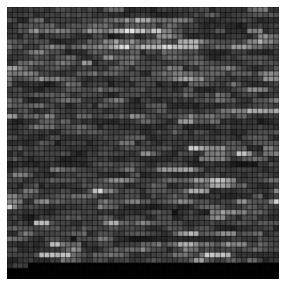

In [34]:
show_image(mean_surv)

<AxesSubplot:>

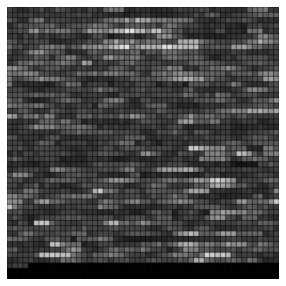

In [35]:
show_image(mean_non_surv)